In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [158]:
df=pd.read_csv('C:/Users/user/Downloads/praktikum_datasets-ca6719dea56242762bba73d073a59cb5b898467a/housing_LR.csv', index_col=0,)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


In [60]:
housing=df[df['district']== 'Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [61]:
x=housing['size']
y=housing['price']
x

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7404    70.0
7422    20.0
7433    32.0
7445    70.0
7464    30.0
Name: size, Length: 1616, dtype: float64

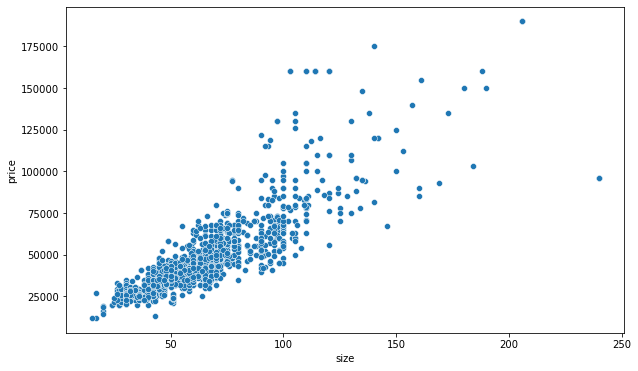

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

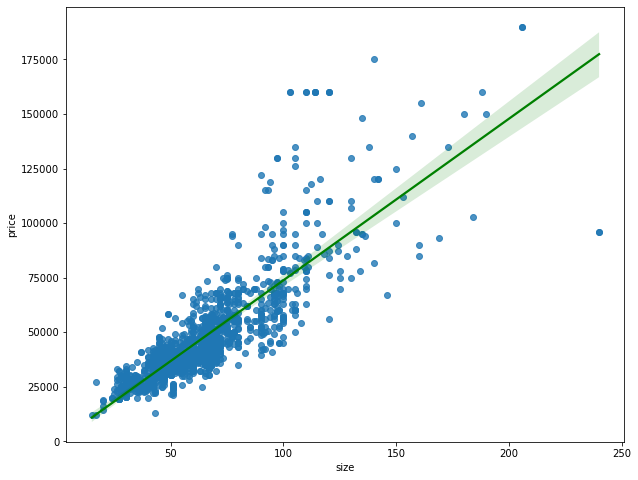

In [66]:
plt.figure(figsize=(10,8))
sns.regplot(data=housing, x='size', y='price', line_kws={'color': 'green'})
plt.show()

In [77]:
x_avr=x.mean()
y_avr=y.mean()

In [80]:
sur=(x-x_avr)*(y-y_avr)

In [141]:
O1=np.sum((x-x_avr)*(y-y_avr))/np.sum((x-x_avr)*(x-x_avr))
O1

740.0264822713249

In [142]:
O2=y_avr-O1*x_avr
O2

-195.94911352666531

In [94]:
def hisob(x):
    y=O2+O1*x
    return y

In [98]:
housing.sample(6)

,district,rooms,size,level,max_levels,price
1536,Чиланзарский,3,78.0,2,7,64500.0
31,Чиланзарский,2,64.0,3,4,56500.0
5689,Чиланзарский,1,32.0,3,4,25000.0
7043,Чиланзарский,2,47.0,4,4,30500.0
6506,Чиланзарский,2,54.0,2,5,43000.0
4378,Чиланзарский,4,100.0,5,9,56000.0


In [102]:
housing

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
...,...,...,...,...,...,...
7404,Чиланзарский,3,70.0,3,4,48000.0
7422,Чиланзарский,1,20.0,5,5,18500.0
7433,Чиланзарский,1,32.0,3,4,28000.0
7445,Чиланзарский,3,70.0,1,4,49800.0


In [139]:
a=(hisob(x)-y)*(hisob(x)-y)


In [140]:
np.sqrt(1/1616*np.sum(a))

12198.477784633837

In [127]:
h_xi

2       30885.163142
3       47905.772234
4       51605.904645
5       20524.792390
6       22004.845355
            ...     
7404    51605.904645
7422    14604.580532
7433    23484.898319
7445    51605.904645
7464    22004.845355
Name: size, Length: 1616, dtype: float64

In [144]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=10, random_state=42)


In [147]:
x_train=np.asanyarray(train_set[['size']])
y_train=np.asanyarray(train_set[['price']])

In [148]:
from sklearn import linear_model
Lr_model=linear_model.LinearRegression()
Lr_model.fit(x_train, y_train)

theta1=Lr_model.coef_[0][0]
theta0=Lr_model.intercept_[0]
print(theta1)
print(theta0)

739.890628099021
-166.27518798370875


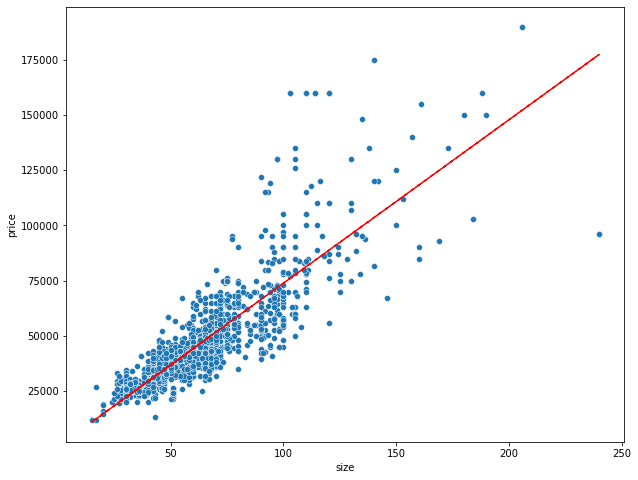

In [150]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta0+theta1*x_train, '--r')
plt.show()

In [151]:
x_test=np.asanyarray(test_set[['size']])
y_test=np.asanyarray(test_set[['price']])

In [152]:
y_predicted= Lr_model.predict(x_test)

In [154]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE=mean_absolute_error(y_test, y_predicted)
RMAE=mean_squared_error(y_test, y_predicted)
print(f"{MAE=}")
print(f"{RMAE=}")

MAE=4158.397166962013
RMAE=34748142.64320748


'pd.parse_dates' is not recognized as an internal or external command,
operable program or batch file.
